In [1]:

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

#Preprocessing 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split 

#Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 

#Evalution
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [2]:
df=pd.read_csv("E:/DEPI/train.csv")
print(df.shape)

(2000, 21)


In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.duplicated().sum()

0

In [5]:
df.nunique()


battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<Axes: >

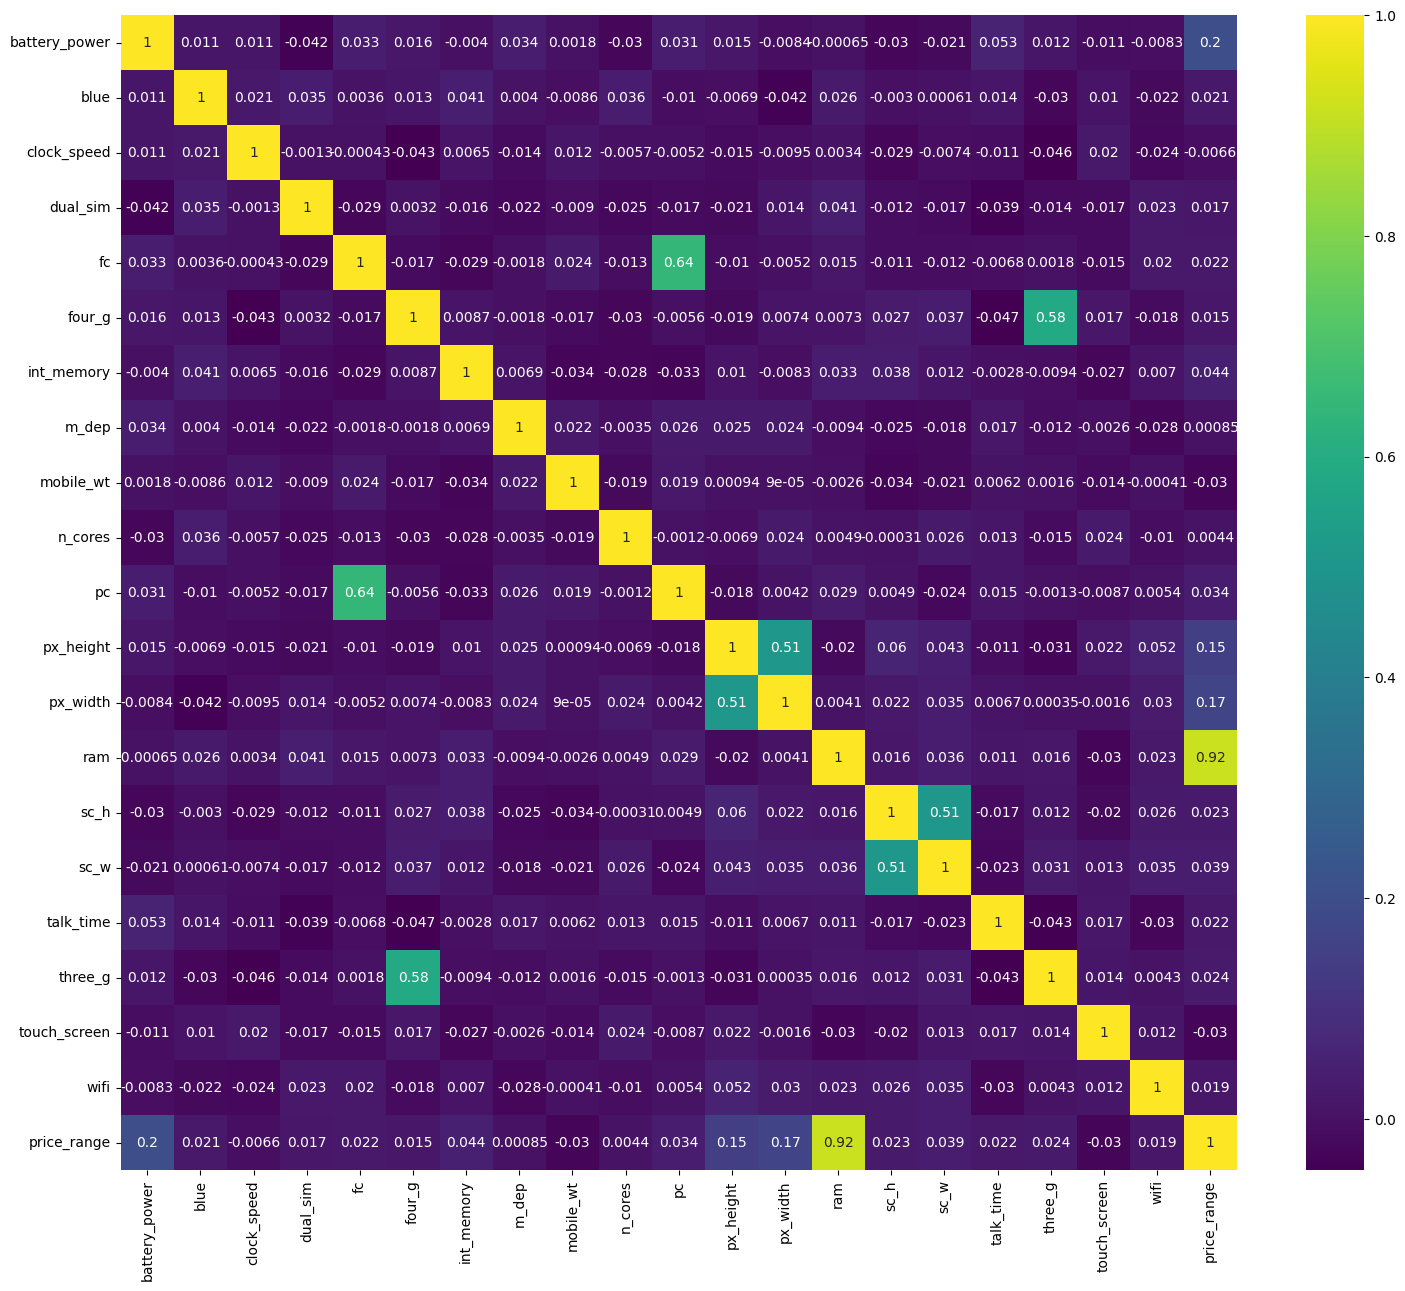

In [8]:
corr = df.corr()
plt.figure(figsize=(18, 15))
sns.heatmap(corr,annot=True,cmap="viridis")

In [9]:
threshold = 0.03

high_corr_feature = corr.index[abs(corr["price_range"]) > threshold].tolist()
high_corr_feature.remove("price_range")
print(high_corr_feature)

['battery_power', 'int_memory', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_w', 'touch_screen']


In [10]:
X = df[high_corr_feature]
y = df["price_range"]

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

clf = LogisticRegression()
clf.fit(X_train_scaled, y_train)

LogisticRegression()

In [14]:
y_pred = clf.predict(X_test_scaled)
y_train_pred = clf.predict(X_train_scaled)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_pred)

print(f"Train Accuracy Score: {train_acc:.4f}")
print(f"Test  Accuracy Score: {test_acc:.4f}")



Train Accuracy Score: 0.9506
Test  Accuracy Score: 0.9567


In [15]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[69  0  0  0]
 [ 2 62  2  0]
 [ 0  2 68  4]
 [ 0  0  3 88]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        69
           1       0.97      0.94      0.95        66
           2       0.93      0.92      0.93        74
           3       0.96      0.97      0.96        91

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_model = SVC(kernel='linear')  # يمكنك تغيير kernel إلى 'linear', 'poly', إلخ حسب الحاجة
svc_model.fit(X_train_scaled, y_train)

y_pred = svc_model.predict(X_test_scaled)
y_train_pred = svc_model.predict(X_train_scaled)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_pred)

print(f"Train Accuracy Score: {train_acc:.4f}")
print(f"Test  Accuracy Score: {test_acc:.4f}")

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Train Accuracy Score: 0.9700
Test  Accuracy Score: 0.9600

Confusion Matrix:
 [[67  2  0  0]
 [ 1 64  1  0]
 [ 0  2 68  4]
 [ 0  0  2 89]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        69
           1       0.94      0.97      0.96        66
           2       0.96      0.92      0.94        74
           3       0.96      0.98      0.97        91

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
y_train_pred = clf.predict(X_train_scaled)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_pred)

print(f"Train Accuracy Score: {train_acc:.4f}")
print(f"Test  Accuracy Score: {test_acc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Train Accuracy Score: 1.0000
Test  Accuracy Score: 0.8767

Confusion Matrix:
 [[68  1  0  0]
 [ 5 51 10  0]
 [ 0  8 59  7]
 [ 0  0  6 85]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96        69
           1       0.85      0.77      0.81        66
           2       0.79      0.80      0.79        74
           3       0.92      0.93      0.93        91

    accuracy                           0.88       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.88      0.88      0.88       300



In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# إنشاء نموذج Random Forest
clf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
clf.fit(X_train_scaled, y_train)

# التنبؤ على بيانات الاختبار والتدريب
y_pred = clf.predict(X_test_scaled)
y_train_pred = clf.predict(X_train_scaled)

# حساب الدقة
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_pred)

# طباعة النتائج
print(f"Train Accuracy Score: {train_acc:.4f}")
print(f"Test  Accuracy Score: {test_acc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Train Accuracy Score: 1.0000
Test  Accuracy Score: 0.9267

Confusion Matrix:
 [[68  1  0  0]
 [ 2 59  5  0]
 [ 0  5 65  4]
 [ 0  0  5 86]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        69
           1       0.91      0.89      0.90        66
           2       0.87      0.88      0.87        74
           3       0.96      0.95      0.95        91

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

